## DATA LOAD

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge
import pywt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
model_use = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)  


from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error


# 최대 줄 수 설정
pd.set_option('display.max_rows', 100)
# 최대 열 수 설정
pd.set_option('display.max_columns', 100)

In [2]:
data_x = pd.read_csv("train_x_1.csv")
data_y = pd.read_csv("train_y_1.csv")
del data_y['ID']

In [3]:
basic = pd.read_csv("basic.csv")
basic.shape

(404, 4676)

In [4]:
data_div_100 = pd.read_csv("data_div_100.csv")
maxes_data = pd.read_csv("maxes_data.csv")
hands_on  = pd.read_csv("hands_w6.csv")
wave_df = pd.read_csv("wave_df_meanonly.csv")
t_wave_df = pd.read_csv("t_wave_df_meanonly.csv")
q_min_df = pd.read_csv("q_min.csv")
pca_df = pd.read_csv("pca_df.csv")
half_std = pd.read_csv("half_std.csv")

In [77]:
total_df = pd.concat([basic,hands_on],axis = 1)
#total_df = pd.concat([wave_df,hands_on,data_div_100],axis = 1)
total_df.shape

(404, 13360)

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
def k_fold(basic_df,model,alpha):
    split_num =10
    kfold = KFold(n_splits=split_num, shuffle=True, random_state=10)
    score = []
    score_mae= []
    for train_index,test_index in kfold.split(basic_df):
        train_x,valid_x = basic_df.iloc[train_index],basic_df.iloc[test_index]
        train_y,valid_y = data_y.iloc[train_index],data_y.iloc[test_index]
        
        #model select
        if model == "lm":
            model_use = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)        
        elif model == "lasso":
            model_use = Lasso(alpha=alpha)
        elif model == "ridge":
            model_use = Ridge(alpha=alpha)
        else:
            print("모델이 존재하지 않습니다.")
            break
        model_use.fit(train_x, train_y)
    
        valid_pred = model_use.predict(valid_x)
        tem = mean_squared_error(valid_pred,valid_y)
        
        tem2 = mean_absolute_error(valid_pred,valid_y)
    
        score.append(tem)
        score_mae.append(tem2)
    total_score = np.mean(score)
    total_score2 = np.mean(score_mae)
    print("%s 모델 K-fold 결과 : %f "%(model,total_score))
    print("%s 모델 K-fold 결과 : %f "%(model,total_score2))

    return total_score


In [82]:
k_fold(pca_df,"ridge",1)

ridge 모델 K-fold 결과 : 0.045222 
ridge 모델 K-fold 결과 : 0.169626 


0.045221511087693546

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import SparsePCA
model_use = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)  
model_use2 = Ridge(alpha=0.1)
model_use3 =Lasso(alpha=0.25)

In [104]:
pca = PCA(n_components=50)
tem = pca.fit_transform(total_df)

pca_df = pd.DataFrame(tem)

In [105]:
scores=cross_val_score(model_use,pca_df, data_y, scoring='neg_mean_squared_error', cv=10)

In [106]:
-np.mean(scores)
#0.055 -> 다른데이터

0.0531039970364775

# PCA

In [374]:
from sklearn.decomposition import PCA
from tqdm import tqdm
score_per_compo =[]
for num_compo in tqdm(range(3,200)):
    pca_score = []
    for i in range(2):
        pca = PCA(n_components=num_compo)
        tem = pca.fit_transform(total_df)

        pca_df = pd.DataFrame(tem)
        score = k_fold(pca_df,"lasso",0.2)
        pca_score.append(score)
    score_per_compo.append(pca_score)

  0%|                                                                                          | 0/197 [00:00<?, ?it/s]

lasso 모델 K-fold 결과 : 0.252756 
lasso 모델 K-fold 결과 : 0.389611 


  1%|▍                                                                                 | 1/197 [00:00<02:17,  1.42it/s]

lasso 모델 K-fold 결과 : 0.252756 
lasso 모델 K-fold 결과 : 0.389611 
lasso 모델 K-fold 결과 : 0.239447 
lasso 모델 K-fold 결과 : 0.372511 


  1%|▊                                                                                 | 2/197 [00:01<02:18,  1.41it/s]

lasso 모델 K-fold 결과 : 0.239447 
lasso 모델 K-fold 결과 : 0.372511 
lasso 모델 K-fold 결과 : 0.239753 
lasso 모델 K-fold 결과 : 0.372598 


  2%|█▏                                                                                | 3/197 [00:02<02:19,  1.39it/s]

lasso 모델 K-fold 결과 : 0.239753 
lasso 모델 K-fold 결과 : 0.372598 
lasso 모델 K-fold 결과 : 0.239718 
lasso 모델 K-fold 결과 : 0.372582 


  2%|█▋                                                                                | 4/197 [00:02<02:19,  1.38it/s]

lasso 모델 K-fold 결과 : 0.239718 
lasso 모델 K-fold 결과 : 0.372582 
lasso 모델 K-fold 결과 : 0.231881 
lasso 모델 K-fold 결과 : 0.373094 


  3%|██                                                                                | 5/197 [00:03<02:19,  1.37it/s]

lasso 모델 K-fold 결과 : 0.231880 
lasso 모델 K-fold 결과 : 0.373094 
lasso 모델 K-fold 결과 : 0.231975 
lasso 모델 K-fold 결과 : 0.373006 


  3%|██▍                                                                               | 6/197 [00:04<02:19,  1.36it/s]

lasso 모델 K-fold 결과 : 0.231976 
lasso 모델 K-fold 결과 : 0.373006 
lasso 모델 K-fold 결과 : 0.221448 
lasso 모델 K-fold 결과 : 0.361817 


  4%|██▉                                                                               | 7/197 [00:05<02:21,  1.34it/s]

lasso 모델 K-fold 결과 : 0.221448 
lasso 모델 K-fold 결과 : 0.361817 
lasso 모델 K-fold 결과 : 0.217746 
lasso 모델 K-fold 결과 : 0.363608 


  4%|███▎                                                                              | 8/197 [00:05<02:21,  1.33it/s]

lasso 모델 K-fold 결과 : 0.217746 
lasso 모델 K-fold 결과 : 0.363608 
lasso 모델 K-fold 결과 : 0.217524 
lasso 모델 K-fold 결과 : 0.364405 


  5%|███▋                                                                              | 9/197 [00:06<02:21,  1.33it/s]

lasso 모델 K-fold 결과 : 0.217524 
lasso 모델 K-fold 결과 : 0.364405 
lasso 모델 K-fold 결과 : 0.214351 
lasso 모델 K-fold 결과 : 0.359540 


  5%|████                                                                             | 10/197 [00:07<02:20,  1.33it/s]

lasso 모델 K-fold 결과 : 0.214351 
lasso 모델 K-fold 결과 : 0.359540 
lasso 모델 K-fold 결과 : 0.211999 
lasso 모델 K-fold 결과 : 0.360047 


  6%|████▌                                                                            | 11/197 [00:08<02:21,  1.31it/s]

lasso 모델 K-fold 결과 : 0.211999 
lasso 모델 K-fold 결과 : 0.360048 
lasso 모델 K-fold 결과 : 0.187820 
lasso 모델 K-fold 결과 : 0.333637 


  6%|████▉                                                                            | 12/197 [00:09<02:23,  1.29it/s]

lasso 모델 K-fold 결과 : 0.187821 
lasso 모델 K-fold 결과 : 0.333639 
lasso 모델 K-fold 결과 : 0.186510 
lasso 모델 K-fold 결과 : 0.331414 


  7%|█████▎                                                                           | 13/197 [00:09<02:24,  1.27it/s]

lasso 모델 K-fold 결과 : 0.186505 
lasso 모델 K-fold 결과 : 0.331411 
lasso 모델 K-fold 결과 : 0.174133 
lasso 모델 K-fold 결과 : 0.320486 


  7%|█████▊                                                                           | 14/197 [00:10<02:25,  1.26it/s]

lasso 모델 K-fold 결과 : 0.174060 
lasso 모델 K-fold 결과 : 0.320421 
lasso 모델 K-fold 결과 : 0.065597 
lasso 모델 K-fold 결과 : 0.198574 


  8%|██████▏                                                                          | 15/197 [00:11<02:25,  1.25it/s]

lasso 모델 K-fold 결과 : 0.065583 
lasso 모델 K-fold 결과 : 0.198548 
lasso 모델 K-fold 결과 : 0.066390 
lasso 모델 K-fold 결과 : 0.199230 


  8%|██████▌                                                                          | 16/197 [00:12<02:25,  1.24it/s]

lasso 모델 K-fold 결과 : 0.066413 
lasso 모델 K-fold 결과 : 0.199253 
lasso 모델 K-fold 결과 : 0.066423 
lasso 모델 K-fold 결과 : 0.198988 


  9%|██████▉                                                                          | 17/197 [00:13<02:27,  1.22it/s]

lasso 모델 K-fold 결과 : 0.066425 
lasso 모델 K-fold 결과 : 0.198993 
lasso 모델 K-fold 결과 : 0.067280 
lasso 모델 K-fold 결과 : 0.198979 


  9%|███████▍                                                                         | 18/197 [00:13<02:26,  1.22it/s]

lasso 모델 K-fold 결과 : 0.067289 
lasso 모델 K-fold 결과 : 0.199004 
lasso 모델 K-fold 결과 : 0.065770 
lasso 모델 K-fold 결과 : 0.198055 


 10%|███████▊                                                                         | 19/197 [00:14<02:26,  1.22it/s]

lasso 모델 K-fold 결과 : 0.065770 
lasso 모델 K-fold 결과 : 0.198056 
lasso 모델 K-fold 결과 : 0.064550 
lasso 모델 K-fold 결과 : 0.196203 


 10%|████████▏                                                                        | 20/197 [00:15<02:29,  1.19it/s]

lasso 모델 K-fold 결과 : 0.064551 
lasso 모델 K-fold 결과 : 0.196196 
lasso 모델 K-fold 결과 : 0.060065 
lasso 모델 K-fold 결과 : 0.191737 


 11%|████████▋                                                                        | 21/197 [00:16<02:31,  1.16it/s]

lasso 모델 K-fold 결과 : 0.060124 
lasso 모델 K-fold 결과 : 0.191753 
lasso 모델 K-fold 결과 : 0.060423 
lasso 모델 K-fold 결과 : 0.192312 


 11%|█████████                                                                        | 22/197 [00:17<02:34,  1.14it/s]

lasso 모델 K-fold 결과 : 0.060417 
lasso 모델 K-fold 결과 : 0.192309 
lasso 모델 K-fold 결과 : 0.060844 
lasso 모델 K-fold 결과 : 0.192388 


 12%|█████████▍                                                                       | 23/197 [00:18<02:32,  1.14it/s]

lasso 모델 K-fold 결과 : 0.060844 
lasso 모델 K-fold 결과 : 0.192387 
lasso 모델 K-fold 결과 : 0.059764 
lasso 모델 K-fold 결과 : 0.192620 


 12%|█████████▊                                                                       | 24/197 [00:19<02:31,  1.14it/s]

lasso 모델 K-fold 결과 : 0.059761 
lasso 모델 K-fold 결과 : 0.192621 
lasso 모델 K-fold 결과 : 0.060429 
lasso 모델 K-fold 결과 : 0.192723 


 13%|██████████▎                                                                      | 25/197 [00:20<02:29,  1.15it/s]

lasso 모델 K-fold 결과 : 0.060428 
lasso 모델 K-fold 결과 : 0.192719 
lasso 모델 K-fold 결과 : 0.054494 
lasso 모델 K-fold 결과 : 0.187054 


 13%|██████████▋                                                                      | 26/197 [00:20<02:29,  1.15it/s]

lasso 모델 K-fold 결과 : 0.054490 
lasso 모델 K-fold 결과 : 0.187041 
lasso 모델 K-fold 결과 : 0.054930 
lasso 모델 K-fold 결과 : 0.187827 


 14%|███████████                                                                      | 27/197 [00:21<02:29,  1.13it/s]

lasso 모델 K-fold 결과 : 0.054923 
lasso 모델 K-fold 결과 : 0.187818 
lasso 모델 K-fold 결과 : 0.054213 
lasso 모델 K-fold 결과 : 0.187428 


 14%|███████████▌                                                                     | 28/197 [00:22<02:32,  1.11it/s]

lasso 모델 K-fold 결과 : 0.054216 
lasso 모델 K-fold 결과 : 0.187424 
lasso 모델 K-fold 결과 : 0.052430 
lasso 모델 K-fold 결과 : 0.183595 


 15%|███████████▉                                                                     | 29/197 [00:23<02:32,  1.10it/s]

lasso 모델 K-fold 결과 : 0.052436 
lasso 모델 K-fold 결과 : 0.183601 
lasso 모델 K-fold 결과 : 0.052270 
lasso 모델 K-fold 결과 : 0.183116 


 15%|████████████▎                                                                    | 30/197 [00:24<02:32,  1.10it/s]

lasso 모델 K-fold 결과 : 0.052269 
lasso 모델 K-fold 결과 : 0.183111 
lasso 모델 K-fold 결과 : 0.051228 
lasso 모델 K-fold 결과 : 0.181413 


 16%|████████████▋                                                                    | 31/197 [00:25<02:32,  1.09it/s]

lasso 모델 K-fold 결과 : 0.051230 
lasso 모델 K-fold 결과 : 0.181414 
lasso 모델 K-fold 결과 : 0.050974 
lasso 모델 K-fold 결과 : 0.181639 


 16%|█████████████▏                                                                   | 32/197 [00:26<02:32,  1.08it/s]

lasso 모델 K-fold 결과 : 0.050965 
lasso 모델 K-fold 결과 : 0.181626 
lasso 모델 K-fold 결과 : 0.050841 
lasso 모델 K-fold 결과 : 0.181072 


 17%|█████████████▌                                                                   | 33/197 [00:27<02:31,  1.08it/s]

lasso 모델 K-fold 결과 : 0.050835 
lasso 모델 K-fold 결과 : 0.181056 
lasso 모델 K-fold 결과 : 0.051140 
lasso 모델 K-fold 결과 : 0.181507 


 17%|█████████████▉                                                                   | 34/197 [00:28<02:32,  1.07it/s]

lasso 모델 K-fold 결과 : 0.051164 
lasso 모델 K-fold 결과 : 0.181564 
lasso 모델 K-fold 결과 : 0.051321 
lasso 모델 K-fold 결과 : 0.180826 


 18%|██████████████▍                                                                  | 35/197 [00:29<02:32,  1.06it/s]

lasso 모델 K-fold 결과 : 0.051326 
lasso 모델 K-fold 결과 : 0.180842 
lasso 모델 K-fold 결과 : 0.051061 
lasso 모델 K-fold 결과 : 0.178447 


 18%|██████████████▊                                                                  | 36/197 [00:30<02:34,  1.04it/s]

lasso 모델 K-fold 결과 : 0.051048 
lasso 모델 K-fold 결과 : 0.178420 
lasso 모델 K-fold 결과 : 0.051477 
lasso 모델 K-fold 결과 : 0.179077 


 19%|███████████████▏                                                                 | 37/197 [00:31<02:48,  1.05s/it]

lasso 모델 K-fold 결과 : 0.051475 
lasso 모델 K-fold 결과 : 0.179064 
lasso 모델 K-fold 결과 : 0.050082 
lasso 모델 K-fold 결과 : 0.176288 


 19%|███████████████▌                                                                 | 38/197 [00:32<02:51,  1.08s/it]

lasso 모델 K-fold 결과 : 0.050121 
lasso 모델 K-fold 결과 : 0.176319 
lasso 모델 K-fold 결과 : 0.050462 
lasso 모델 K-fold 결과 : 0.176789 


 20%|████████████████                                                                 | 39/197 [00:33<02:48,  1.07s/it]

lasso 모델 K-fold 결과 : 0.050284 
lasso 모델 K-fold 결과 : 0.176570 
lasso 모델 K-fold 결과 : 0.050244 
lasso 모델 K-fold 결과 : 0.176453 


 20%|████████████████▍                                                                | 40/197 [00:34<02:36,  1.00it/s]

lasso 모델 K-fold 결과 : 0.050061 
lasso 모델 K-fold 결과 : 0.176143 
lasso 모델 K-fold 결과 : 0.048878 
lasso 모델 K-fold 결과 : 0.173292 


 21%|████████████████▊                                                                | 41/197 [00:35<02:29,  1.04it/s]

lasso 모델 K-fold 결과 : 0.048734 
lasso 모델 K-fold 결과 : 0.173009 
lasso 모델 K-fold 결과 : 0.048993 
lasso 모델 K-fold 결과 : 0.173010 


 21%|█████████████████▎                                                               | 42/197 [00:36<02:24,  1.08it/s]

lasso 모델 K-fold 결과 : 0.049230 
lasso 모델 K-fold 결과 : 0.173277 
lasso 모델 K-fold 결과 : 0.049497 
lasso 모델 K-fold 결과 : 0.174575 


 22%|█████████████████▋                                                               | 43/197 [00:37<02:21,  1.09it/s]

lasso 모델 K-fold 결과 : 0.049401 
lasso 모델 K-fold 결과 : 0.174784 
lasso 모델 K-fold 결과 : 0.049371 
lasso 모델 K-fold 결과 : 0.175340 


 22%|██████████████████                                                               | 44/197 [00:38<02:18,  1.11it/s]

lasso 모델 K-fold 결과 : 0.048936 
lasso 모델 K-fold 결과 : 0.175105 
lasso 모델 K-fold 결과 : 0.049801 
lasso 모델 K-fold 결과 : 0.175993 


 23%|██████████████████▌                                                              | 45/197 [00:39<02:16,  1.11it/s]

lasso 모델 K-fold 결과 : 0.049429 
lasso 모델 K-fold 결과 : 0.175835 
lasso 모델 K-fold 결과 : 0.049480 
lasso 모델 K-fold 결과 : 0.176258 


 23%|██████████████████▉                                                              | 46/197 [00:39<02:14,  1.12it/s]

lasso 모델 K-fold 결과 : 0.049249 
lasso 모델 K-fold 결과 : 0.175588 
lasso 모델 K-fold 결과 : 0.049687 
lasso 모델 K-fold 결과 : 0.176335 


 24%|███████████████████▎                                                             | 47/197 [00:40<02:12,  1.13it/s]

lasso 모델 K-fold 결과 : 0.049276 
lasso 모델 K-fold 결과 : 0.175809 
lasso 모델 K-fold 결과 : 0.049657 
lasso 모델 K-fold 결과 : 0.176523 


 24%|███████████████████▋                                                             | 48/197 [00:41<02:10,  1.14it/s]

lasso 모델 K-fold 결과 : 0.048790 
lasso 모델 K-fold 결과 : 0.174789 
lasso 모델 K-fold 결과 : 0.048501 
lasso 모델 K-fold 결과 : 0.174719 


 25%|████████████████████▏                                                            | 49/197 [00:42<02:10,  1.13it/s]

lasso 모델 K-fold 결과 : 0.049127 
lasso 모델 K-fold 결과 : 0.175781 
lasso 모델 K-fold 결과 : 0.049440 
lasso 모델 K-fold 결과 : 0.176461 


 25%|████████████████████▌                                                            | 50/197 [00:43<02:10,  1.12it/s]

lasso 모델 K-fold 결과 : 0.049306 
lasso 모델 K-fold 결과 : 0.176595 
lasso 모델 K-fold 결과 : 0.049873 
lasso 모델 K-fold 결과 : 0.177065 


 26%|████████████████████▉                                                            | 51/197 [00:44<02:10,  1.12it/s]

lasso 모델 K-fold 결과 : 0.049225 
lasso 모델 K-fold 결과 : 0.176107 
lasso 모델 K-fold 결과 : 0.047178 
lasso 모델 K-fold 결과 : 0.173321 


 26%|█████████████████████▍                                                           | 52/197 [00:45<02:13,  1.09it/s]

lasso 모델 K-fold 결과 : 0.047111 
lasso 모델 K-fold 결과 : 0.173187 
lasso 모델 K-fold 결과 : 0.046976 
lasso 모델 K-fold 결과 : 0.172211 


 27%|█████████████████████▊                                                           | 53/197 [00:46<02:12,  1.08it/s]

lasso 모델 K-fold 결과 : 0.046852 
lasso 모델 K-fold 결과 : 0.172222 
lasso 모델 K-fold 결과 : 0.046836 
lasso 모델 K-fold 결과 : 0.172712 


 27%|██████████████████████▏                                                          | 54/197 [00:47<02:11,  1.09it/s]

lasso 모델 K-fold 결과 : 0.046878 
lasso 모델 K-fold 결과 : 0.172475 
lasso 모델 K-fold 결과 : 0.047280 
lasso 모델 K-fold 결과 : 0.173571 


 28%|██████████████████████▌                                                          | 55/197 [00:48<02:10,  1.08it/s]

lasso 모델 K-fold 결과 : 0.047212 
lasso 모델 K-fold 결과 : 0.172867 
lasso 모델 K-fold 결과 : 0.047843 
lasso 모델 K-fold 결과 : 0.173163 


 28%|███████████████████████                                                          | 56/197 [00:49<02:10,  1.08it/s]

lasso 모델 K-fold 결과 : 0.047509 
lasso 모델 K-fold 결과 : 0.173643 
lasso 모델 K-fold 결과 : 0.046632 
lasso 모델 K-fold 결과 : 0.172913 


 29%|███████████████████████▍                                                         | 57/197 [00:49<02:09,  1.08it/s]

lasso 모델 K-fold 결과 : 0.047226 
lasso 모델 K-fold 결과 : 0.172735 
lasso 모델 K-fold 결과 : 0.046929 
lasso 모델 K-fold 결과 : 0.173243 


 29%|███████████████████████▊                                                         | 58/197 [00:50<02:09,  1.08it/s]

lasso 모델 K-fold 결과 : 0.047387 
lasso 모델 K-fold 결과 : 0.173312 
lasso 모델 K-fold 결과 : 0.047258 
lasso 모델 K-fold 결과 : 0.173646 


 30%|████████████████████████▎                                                        | 59/197 [00:51<02:08,  1.07it/s]

lasso 모델 K-fold 결과 : 0.047078 
lasso 모델 K-fold 결과 : 0.173501 
lasso 모델 K-fold 결과 : 0.047990 
lasso 모델 K-fold 결과 : 0.174302 


 30%|████████████████████████▋                                                        | 60/197 [00:52<02:08,  1.07it/s]

lasso 모델 K-fold 결과 : 0.046968 
lasso 모델 K-fold 결과 : 0.172911 
lasso 모델 K-fold 결과 : 0.047606 
lasso 모델 K-fold 결과 : 0.174867 


 31%|█████████████████████████                                                        | 61/197 [00:53<02:07,  1.07it/s]

lasso 모델 K-fold 결과 : 0.047214 
lasso 모델 K-fold 결과 : 0.174828 
lasso 모델 K-fold 결과 : 0.047039 
lasso 모델 K-fold 결과 : 0.172976 


 31%|█████████████████████████▍                                                       | 62/197 [00:54<02:07,  1.06it/s]

lasso 모델 K-fold 결과 : 0.047746 
lasso 모델 K-fold 결과 : 0.174518 
lasso 모델 K-fold 결과 : 0.046861 
lasso 모델 K-fold 결과 : 0.174285 


 32%|█████████████████████████▉                                                       | 63/197 [00:55<02:07,  1.05it/s]

lasso 모델 K-fold 결과 : 0.047638 
lasso 모델 K-fold 결과 : 0.175799 
lasso 모델 K-fold 결과 : 0.046536 
lasso 모델 K-fold 결과 : 0.171621 


 32%|██████████████████████████▎                                                      | 64/197 [00:56<02:07,  1.04it/s]

lasso 모델 K-fold 결과 : 0.046245 
lasso 모델 K-fold 결과 : 0.172547 
lasso 모델 K-fold 결과 : 0.047726 
lasso 모델 K-fold 결과 : 0.175543 


 33%|██████████████████████████▋                                                      | 65/197 [00:57<02:07,  1.04it/s]

lasso 모델 K-fold 결과 : 0.046824 
lasso 모델 K-fold 결과 : 0.173178 
lasso 모델 K-fold 결과 : 0.047213 
lasso 모델 K-fold 결과 : 0.174452 


 34%|███████████████████████████▏                                                     | 66/197 [00:58<02:07,  1.03it/s]

lasso 모델 K-fold 결과 : 0.046660 
lasso 모델 K-fold 결과 : 0.173453 
lasso 모델 K-fold 결과 : 0.046397 
lasso 모델 K-fold 결과 : 0.174286 


 34%|███████████████████████████▌                                                     | 67/197 [00:59<02:07,  1.02it/s]

lasso 모델 K-fold 결과 : 0.047906 
lasso 모델 K-fold 결과 : 0.174339 
lasso 모델 K-fold 결과 : 0.047649 
lasso 모델 K-fold 결과 : 0.176242 


 35%|███████████████████████████▉                                                     | 68/197 [01:00<02:06,  1.02it/s]

lasso 모델 K-fold 결과 : 0.048223 
lasso 모델 K-fold 결과 : 0.176841 
lasso 모델 K-fold 결과 : 0.047405 
lasso 모델 K-fold 결과 : 0.175292 


 35%|████████████████████████████▎                                                    | 69/197 [01:01<02:06,  1.02it/s]

lasso 모델 K-fold 결과 : 0.048254 
lasso 모델 K-fold 결과 : 0.177638 
lasso 모델 K-fold 결과 : 0.048882 
lasso 모델 K-fold 결과 : 0.177245 


 36%|████████████████████████████▊                                                    | 70/197 [01:02<02:06,  1.01it/s]

lasso 모델 K-fold 결과 : 0.048805 
lasso 모델 K-fold 결과 : 0.178955 
lasso 모델 K-fold 결과 : 0.047074 
lasso 모델 K-fold 결과 : 0.175638 


 36%|█████████████████████████████▏                                                   | 71/197 [01:03<02:05,  1.00it/s]

lasso 모델 K-fold 결과 : 0.048428 
lasso 모델 K-fold 결과 : 0.176868 
lasso 모델 K-fold 결과 : 0.047157 
lasso 모델 K-fold 결과 : 0.174670 


 37%|█████████████████████████████▌                                                   | 72/197 [01:04<02:04,  1.00it/s]

lasso 모델 K-fold 결과 : 0.048544 
lasso 모델 K-fold 결과 : 0.175876 
lasso 모델 K-fold 결과 : 0.048705 
lasso 모델 K-fold 결과 : 0.175891 


 37%|██████████████████████████████                                                   | 73/197 [01:05<02:04,  1.00s/it]

lasso 모델 K-fold 결과 : 0.048248 
lasso 모델 K-fold 결과 : 0.175719 
lasso 모델 K-fold 결과 : 0.047877 
lasso 모델 K-fold 결과 : 0.176204 


 38%|██████████████████████████████▍                                                  | 74/197 [01:06<02:04,  1.01s/it]

lasso 모델 K-fold 결과 : 0.046374 
lasso 모델 K-fold 결과 : 0.174704 
lasso 모델 K-fold 결과 : 0.047771 
lasso 모델 K-fold 결과 : 0.177823 


 38%|██████████████████████████████▊                                                  | 75/197 [01:07<02:04,  1.02s/it]

lasso 모델 K-fold 결과 : 0.047343 
lasso 모델 K-fold 결과 : 0.173919 
lasso 모델 K-fold 결과 : 0.048246 
lasso 모델 K-fold 결과 : 0.175879 


 39%|███████████████████████████████▏                                                 | 76/197 [01:08<02:03,  1.02s/it]

lasso 모델 K-fold 결과 : 0.048149 
lasso 모델 K-fold 결과 : 0.177246 
lasso 모델 K-fold 결과 : 0.048533 
lasso 모델 K-fold 결과 : 0.178488 


 39%|███████████████████████████████▋                                                 | 77/197 [01:09<02:02,  1.02s/it]

lasso 모델 K-fold 결과 : 0.047230 
lasso 모델 K-fold 결과 : 0.174924 
lasso 모델 K-fold 결과 : 0.048081 
lasso 모델 K-fold 결과 : 0.176665 


 40%|████████████████████████████████                                                 | 78/197 [01:10<02:02,  1.03s/it]

lasso 모델 K-fold 결과 : 0.045689 
lasso 모델 K-fold 결과 : 0.172741 
lasso 모델 K-fold 결과 : 0.049512 
lasso 모델 K-fold 결과 : 0.178830 


 40%|████████████████████████████████▍                                                | 79/197 [01:11<02:02,  1.04s/it]

lasso 모델 K-fold 결과 : 0.047891 
lasso 모델 K-fold 결과 : 0.177057 
lasso 모델 K-fold 결과 : 0.048243 
lasso 모델 K-fold 결과 : 0.177995 


 41%|████████████████████████████████▉                                                | 80/197 [01:12<02:03,  1.06s/it]

lasso 모델 K-fold 결과 : 0.048383 
lasso 모델 K-fold 결과 : 0.178444 
lasso 모델 K-fold 결과 : 0.046821 
lasso 모델 K-fold 결과 : 0.176873 


 41%|█████████████████████████████████▎                                               | 81/197 [01:13<02:02,  1.05s/it]

lasso 모델 K-fold 결과 : 0.045801 
lasso 모델 K-fold 결과 : 0.172892 
lasso 모델 K-fold 결과 : 0.049282 
lasso 모델 K-fold 결과 : 0.177963 


 42%|█████████████████████████████████▋                                               | 82/197 [01:15<02:01,  1.06s/it]

lasso 모델 K-fold 결과 : 0.047846 
lasso 모델 K-fold 결과 : 0.178707 
lasso 모델 K-fold 결과 : 0.049223 
lasso 모델 K-fold 결과 : 0.178807 


 42%|██████████████████████████████████▏                                              | 83/197 [01:16<02:02,  1.08s/it]

lasso 모델 K-fold 결과 : 0.048623 
lasso 모델 K-fold 결과 : 0.178946 
lasso 모델 K-fold 결과 : 0.047430 
lasso 모델 K-fold 결과 : 0.177909 


 43%|██████████████████████████████████▌                                              | 84/197 [01:17<02:03,  1.09s/it]

lasso 모델 K-fold 결과 : 0.047008 
lasso 모델 K-fold 결과 : 0.175421 
lasso 모델 K-fold 결과 : 0.046241 
lasso 모델 K-fold 결과 : 0.174260 


 43%|██████████████████████████████████▉                                              | 85/197 [01:18<02:02,  1.09s/it]

lasso 모델 K-fold 결과 : 0.047353 
lasso 모델 K-fold 결과 : 0.175405 
lasso 모델 K-fold 결과 : 0.046189 
lasso 모델 K-fold 결과 : 0.173523 


 44%|███████████████████████████████████▎                                             | 86/197 [01:19<02:01,  1.09s/it]

lasso 모델 K-fold 결과 : 0.047639 
lasso 모델 K-fold 결과 : 0.176110 
lasso 모델 K-fold 결과 : 0.046007 
lasso 모델 K-fold 결과 : 0.171170 


 44%|███████████████████████████████████▊                                             | 87/197 [01:20<02:00,  1.10s/it]

lasso 모델 K-fold 결과 : 0.047620 
lasso 모델 K-fold 결과 : 0.176616 
lasso 모델 K-fold 결과 : 0.047355 
lasso 모델 K-fold 결과 : 0.176170 


 45%|████████████████████████████████████▏                                            | 88/197 [01:21<02:00,  1.10s/it]

lasso 모델 K-fold 결과 : 0.046885 
lasso 모델 K-fold 결과 : 0.175726 
lasso 모델 K-fold 결과 : 0.045110 
lasso 모델 K-fold 결과 : 0.170866 


 45%|████████████████████████████████████▌                                            | 89/197 [01:22<02:00,  1.11s/it]

lasso 모델 K-fold 결과 : 0.045776 
lasso 모델 K-fold 결과 : 0.174171 
lasso 모델 K-fold 결과 : 0.049399 
lasso 모델 K-fold 결과 : 0.179271 


 46%|█████████████████████████████████████                                            | 90/197 [01:24<02:00,  1.13s/it]

lasso 모델 K-fold 결과 : 0.047942 
lasso 모델 K-fold 결과 : 0.175571 
lasso 모델 K-fold 결과 : 0.044540 
lasso 모델 K-fold 결과 : 0.168959 


 46%|█████████████████████████████████████▍                                           | 91/197 [01:25<02:02,  1.16s/it]

lasso 모델 K-fold 결과 : 0.047292 
lasso 모델 K-fold 결과 : 0.173559 
lasso 모델 K-fold 결과 : 0.048101 
lasso 모델 K-fold 결과 : 0.175044 


 47%|█████████████████████████████████████▊                                           | 92/197 [01:26<02:01,  1.16s/it]

lasso 모델 K-fold 결과 : 0.047975 
lasso 모델 K-fold 결과 : 0.178000 
lasso 모델 K-fold 결과 : 0.047724 
lasso 모델 K-fold 결과 : 0.176456 


 47%|██████████████████████████████████████▏                                          | 93/197 [01:27<02:00,  1.16s/it]

lasso 모델 K-fold 결과 : 0.047707 
lasso 모델 K-fold 결과 : 0.176658 
lasso 모델 K-fold 결과 : 0.044857 
lasso 모델 K-fold 결과 : 0.170785 


 48%|██████████████████████████████████████▋                                          | 94/197 [01:28<02:00,  1.17s/it]

lasso 모델 K-fold 결과 : 0.045419 
lasso 모델 K-fold 결과 : 0.172130 
lasso 모델 K-fold 결과 : 0.047318 
lasso 모델 K-fold 결과 : 0.176538 


 48%|███████████████████████████████████████                                          | 95/197 [01:29<01:59,  1.18s/it]

lasso 모델 K-fold 결과 : 0.047511 
lasso 모델 K-fold 결과 : 0.174779 
lasso 모델 K-fold 결과 : 0.045187 
lasso 모델 K-fold 결과 : 0.172265 


 49%|███████████████████████████████████████▍                                         | 96/197 [01:31<01:59,  1.18s/it]

lasso 모델 K-fold 결과 : 0.047546 
lasso 모델 K-fold 결과 : 0.174094 
lasso 모델 K-fold 결과 : 0.046736 
lasso 모델 K-fold 결과 : 0.174254 


 49%|███████████████████████████████████████▉                                         | 97/197 [01:32<02:06,  1.26s/it]

lasso 모델 K-fold 결과 : 0.046318 
lasso 모델 K-fold 결과 : 0.171660 
lasso 모델 K-fold 결과 : 0.045939 
lasso 모델 K-fold 결과 : 0.172777 


 50%|████████████████████████████████████████▎                                        | 98/197 [01:33<02:04,  1.26s/it]

lasso 모델 K-fold 결과 : 0.048070 
lasso 모델 K-fold 결과 : 0.177370 
lasso 모델 K-fold 결과 : 0.048191 
lasso 모델 K-fold 결과 : 0.176708 


 50%|████████████████████████████████████████▋                                        | 99/197 [01:35<02:03,  1.26s/it]

lasso 모델 K-fold 결과 : 0.045013 
lasso 모델 K-fold 결과 : 0.171015 
lasso 모델 K-fold 결과 : 0.046729 
lasso 모델 K-fold 결과 : 0.175550 


 51%|████████████████████████████████████████▌                                       | 100/197 [01:36<02:01,  1.25s/it]

lasso 모델 K-fold 결과 : 0.045840 
lasso 모델 K-fold 결과 : 0.172316 
lasso 모델 K-fold 결과 : 0.048839 
lasso 모델 K-fold 결과 : 0.179550 


 51%|█████████████████████████████████████████                                       | 101/197 [01:37<01:59,  1.25s/it]

lasso 모델 K-fold 결과 : 0.046113 
lasso 모델 K-fold 결과 : 0.174881 
lasso 모델 K-fold 결과 : 0.048536 
lasso 모델 K-fold 결과 : 0.176071 


 52%|█████████████████████████████████████████▍                                      | 102/197 [01:38<02:00,  1.27s/it]

lasso 모델 K-fold 결과 : 0.048819 
lasso 모델 K-fold 결과 : 0.178587 
lasso 모델 K-fold 결과 : 0.047878 
lasso 모델 K-fold 결과 : 0.175281 


 52%|█████████████████████████████████████████▊                                      | 103/197 [01:40<02:04,  1.32s/it]

lasso 모델 K-fold 결과 : 0.047484 
lasso 모델 K-fold 결과 : 0.175871 
lasso 모델 K-fold 결과 : 0.045902 
lasso 모델 K-fold 결과 : 0.173457 


 53%|██████████████████████████████████████████▏                                     | 104/197 [01:41<02:04,  1.34s/it]

lasso 모델 K-fold 결과 : 0.046234 
lasso 모델 K-fold 결과 : 0.171370 
lasso 모델 K-fold 결과 : 0.048133 
lasso 모델 K-fold 결과 : 0.175597 


 53%|██████████████████████████████████████████▋                                     | 105/197 [01:43<02:02,  1.33s/it]

lasso 모델 K-fold 결과 : 0.047017 
lasso 모델 K-fold 결과 : 0.174903 
lasso 모델 K-fold 결과 : 0.048104 
lasso 모델 K-fold 결과 : 0.178425 


 54%|███████████████████████████████████████████                                     | 106/197 [01:44<01:58,  1.30s/it]

lasso 모델 K-fold 결과 : 0.045866 
lasso 모델 K-fold 결과 : 0.173000 
lasso 모델 K-fold 결과 : 0.049499 
lasso 모델 K-fold 결과 : 0.180187 


 54%|███████████████████████████████████████████▍                                    | 107/197 [01:46<02:09,  1.44s/it]

lasso 모델 K-fold 결과 : 0.043280 
lasso 모델 K-fold 결과 : 0.168351 
lasso 모델 K-fold 결과 : 0.045744 
lasso 모델 K-fold 결과 : 0.172128 


 55%|███████████████████████████████████████████▊                                    | 108/197 [01:48<02:23,  1.61s/it]

lasso 모델 K-fold 결과 : 0.045159 
lasso 모델 K-fold 결과 : 0.172508 
lasso 모델 K-fold 결과 : 0.047500 
lasso 모델 K-fold 결과 : 0.176743 


 55%|████████████████████████████████████████████▎                                   | 109/197 [01:49<02:14,  1.53s/it]

lasso 모델 K-fold 결과 : 0.045851 
lasso 모델 K-fold 결과 : 0.171803 
lasso 모델 K-fold 결과 : 0.045662 
lasso 모델 K-fold 결과 : 0.172331 


 56%|████████████████████████████████████████████▋                                   | 110/197 [01:50<02:06,  1.45s/it]

lasso 모델 K-fold 결과 : 0.043422 
lasso 모델 K-fold 결과 : 0.168523 
lasso 모델 K-fold 결과 : 0.046071 
lasso 모델 K-fold 결과 : 0.172606 


 56%|█████████████████████████████████████████████                                   | 111/197 [01:52<02:02,  1.42s/it]

lasso 모델 K-fold 결과 : 0.046211 
lasso 모델 K-fold 결과 : 0.173393 
lasso 모델 K-fold 결과 : 0.046131 
lasso 모델 K-fold 결과 : 0.172781 


 57%|█████████████████████████████████████████████▍                                  | 112/197 [01:53<02:01,  1.43s/it]

lasso 모델 K-fold 결과 : 0.046617 
lasso 모델 K-fold 결과 : 0.174449 
lasso 모델 K-fold 결과 : 0.046116 
lasso 모델 K-fold 결과 : 0.173530 


 57%|█████████████████████████████████████████████▉                                  | 113/197 [01:54<02:01,  1.45s/it]

lasso 모델 K-fold 결과 : 0.047479 
lasso 모델 K-fold 결과 : 0.174525 
lasso 모델 K-fold 결과 : 0.049272 
lasso 모델 K-fold 결과 : 0.179075 


 58%|██████████████████████████████████████████████▎                                 | 114/197 [01:56<01:59,  1.44s/it]

lasso 모델 K-fold 결과 : 0.046974 
lasso 모델 K-fold 결과 : 0.173393 
lasso 모델 K-fold 결과 : 0.044384 
lasso 모델 K-fold 결과 : 0.170210 


 58%|██████████████████████████████████████████████▋                                 | 115/197 [01:57<01:55,  1.41s/it]

lasso 모델 K-fold 결과 : 0.045358 
lasso 모델 K-fold 결과 : 0.171416 
lasso 모델 K-fold 결과 : 0.046198 
lasso 모델 K-fold 결과 : 0.174233 


 59%|███████████████████████████████████████████████                                 | 116/197 [01:59<01:57,  1.45s/it]

lasso 모델 K-fold 결과 : 0.045766 
lasso 모델 K-fold 결과 : 0.171884 
lasso 모델 K-fold 결과 : 0.046165 
lasso 모델 K-fold 결과 : 0.173421 


 59%|███████████████████████████████████████████████▌                                | 117/197 [02:00<01:51,  1.40s/it]

lasso 모델 K-fold 결과 : 0.043921 
lasso 모델 K-fold 결과 : 0.167640 
lasso 모델 K-fold 결과 : 0.045492 
lasso 모델 K-fold 결과 : 0.172027 


 60%|███████████████████████████████████████████████▉                                | 118/197 [02:01<01:50,  1.40s/it]

lasso 모델 K-fold 결과 : 0.044315 
lasso 모델 K-fold 결과 : 0.170779 
lasso 모델 K-fold 결과 : 0.046580 
lasso 모델 K-fold 결과 : 0.174388 


 60%|████████████████████████████████████████████████▎                               | 119/197 [02:03<01:47,  1.38s/it]

lasso 모델 K-fold 결과 : 0.045341 
lasso 모델 K-fold 결과 : 0.172482 
lasso 모델 K-fold 결과 : 0.045712 
lasso 모델 K-fold 결과 : 0.173159 


 61%|████████████████████████████████████████████████▋                               | 120/197 [02:04<01:45,  1.37s/it]

lasso 모델 K-fold 결과 : 0.046109 
lasso 모델 K-fold 결과 : 0.172546 
lasso 모델 K-fold 결과 : 0.045404 
lasso 모델 K-fold 결과 : 0.171624 


 61%|█████████████████████████████████████████████████▏                              | 121/197 [02:05<01:43,  1.36s/it]

lasso 모델 K-fold 결과 : 0.044631 
lasso 모델 K-fold 결과 : 0.170082 
lasso 모델 K-fold 결과 : 0.045251 
lasso 모델 K-fold 결과 : 0.170229 


 62%|█████████████████████████████████████████████████▌                              | 122/197 [02:07<01:45,  1.40s/it]

lasso 모델 K-fold 결과 : 0.048041 
lasso 모델 K-fold 결과 : 0.175845 
lasso 모델 K-fold 결과 : 0.044659 
lasso 모델 K-fold 결과 : 0.170259 


 62%|█████████████████████████████████████████████████▉                              | 123/197 [02:08<01:42,  1.39s/it]

lasso 모델 K-fold 결과 : 0.047122 
lasso 모델 K-fold 결과 : 0.173910 
lasso 모델 K-fold 결과 : 0.047935 
lasso 모델 K-fold 결과 : 0.176760 


 63%|██████████████████████████████████████████████████▎                             | 124/197 [02:10<01:41,  1.39s/it]

lasso 모델 K-fold 결과 : 0.048308 
lasso 모델 K-fold 결과 : 0.175778 
lasso 모델 K-fold 결과 : 0.046550 
lasso 모델 K-fold 결과 : 0.171618 


 63%|██████████████████████████████████████████████████▊                             | 125/197 [02:11<01:39,  1.38s/it]

lasso 모델 K-fold 결과 : 0.047828 
lasso 모델 K-fold 결과 : 0.175964 
lasso 모델 K-fold 결과 : 0.048371 
lasso 모델 K-fold 결과 : 0.176362 


 64%|███████████████████████████████████████████████████▏                            | 126/197 [02:12<01:37,  1.37s/it]

lasso 모델 K-fold 결과 : 0.046099 
lasso 모델 K-fold 결과 : 0.172585 
lasso 모델 K-fold 결과 : 0.047311 
lasso 모델 K-fold 결과 : 0.176192 


 64%|███████████████████████████████████████████████████▌                            | 127/197 [02:14<01:35,  1.36s/it]

lasso 모델 K-fold 결과 : 0.046518 
lasso 모델 K-fold 결과 : 0.173231 
lasso 모델 K-fold 결과 : 0.048269 
lasso 모델 K-fold 결과 : 0.177945 


 65%|███████████████████████████████████████████████████▉                            | 128/197 [02:15<01:34,  1.37s/it]

lasso 모델 K-fold 결과 : 0.046024 
lasso 모델 K-fold 결과 : 0.172084 
lasso 모델 K-fold 결과 : 0.045405 
lasso 모델 K-fold 결과 : 0.171174 


 65%|████████████████████████████████████████████████████▍                           | 129/197 [02:16<01:33,  1.37s/it]

lasso 모델 K-fold 결과 : 0.046506 
lasso 모델 K-fold 결과 : 0.174046 
lasso 모델 K-fold 결과 : 0.046432 
lasso 모델 K-fold 결과 : 0.171912 


 66%|████████████████████████████████████████████████████▊                           | 130/197 [02:18<01:32,  1.38s/it]

lasso 모델 K-fold 결과 : 0.046023 
lasso 모델 K-fold 결과 : 0.172595 
lasso 모델 K-fold 결과 : 0.047309 
lasso 모델 K-fold 결과 : 0.173823 


 66%|█████████████████████████████████████████████████████▏                          | 131/197 [02:19<01:31,  1.39s/it]

lasso 모델 K-fold 결과 : 0.047945 
lasso 모델 K-fold 결과 : 0.176655 
lasso 모델 K-fold 결과 : 0.046258 
lasso 모델 K-fold 결과 : 0.172414 


 67%|█████████████████████████████████████████████████████▌                          | 132/197 [02:21<01:30,  1.40s/it]

lasso 모델 K-fold 결과 : 0.046941 
lasso 모델 K-fold 결과 : 0.173677 
lasso 모델 K-fold 결과 : 0.046406 
lasso 모델 K-fold 결과 : 0.172674 


 68%|██████████████████████████████████████████████████████                          | 133/197 [02:22<01:30,  1.42s/it]

lasso 모델 K-fold 결과 : 0.045946 
lasso 모델 K-fold 결과 : 0.173296 
lasso 모델 K-fold 결과 : 0.046857 
lasso 모델 K-fold 결과 : 0.172228 


 68%|██████████████████████████████████████████████████████▍                         | 134/197 [02:24<01:32,  1.47s/it]

lasso 모델 K-fold 결과 : 0.046671 
lasso 모델 K-fold 결과 : 0.174043 
lasso 모델 K-fold 결과 : 0.048392 
lasso 모델 K-fold 결과 : 0.174850 


 69%|██████████████████████████████████████████████████████▊                         | 135/197 [02:25<01:32,  1.49s/it]

lasso 모델 K-fold 결과 : 0.047934 
lasso 모델 K-fold 결과 : 0.177141 
lasso 모델 K-fold 결과 : 0.046686 
lasso 모델 K-fold 결과 : 0.171588 


 69%|███████████████████████████████████████████████████████▏                        | 136/197 [02:27<01:30,  1.48s/it]

lasso 모델 K-fold 결과 : 0.046606 
lasso 모델 K-fold 결과 : 0.174136 
lasso 모델 K-fold 결과 : 0.048277 
lasso 모델 K-fold 결과 : 0.175780 


 70%|███████████████████████████████████████████████████████▋                        | 137/197 [02:28<01:29,  1.50s/it]

lasso 모델 K-fold 결과 : 0.048286 
lasso 모델 K-fold 결과 : 0.176322 
lasso 모델 K-fold 결과 : 0.046556 
lasso 모델 K-fold 결과 : 0.172014 


 70%|████████████████████████████████████████████████████████                        | 138/197 [02:30<01:27,  1.49s/it]

lasso 모델 K-fold 결과 : 0.048328 
lasso 모델 K-fold 결과 : 0.176663 
lasso 모델 K-fold 결과 : 0.047588 
lasso 모델 K-fold 결과 : 0.175258 


 71%|████████████████████████████████████████████████████████▍                       | 139/197 [02:31<01:27,  1.51s/it]

lasso 모델 K-fold 결과 : 0.048111 
lasso 모델 K-fold 결과 : 0.177097 
lasso 모델 K-fold 결과 : 0.048349 
lasso 모델 K-fold 결과 : 0.179182 


 71%|████████████████████████████████████████████████████████▊                       | 140/197 [02:33<01:25,  1.50s/it]

lasso 모델 K-fold 결과 : 0.045831 
lasso 모델 K-fold 결과 : 0.172828 
lasso 모델 K-fold 결과 : 0.048037 
lasso 모델 K-fold 결과 : 0.175528 


 72%|█████████████████████████████████████████████████████████▎                      | 141/197 [02:34<01:23,  1.49s/it]

lasso 모델 K-fold 결과 : 0.047052 
lasso 모델 K-fold 결과 : 0.174780 
lasso 모델 K-fold 결과 : 0.044933 
lasso 모델 K-fold 결과 : 0.169818 


 72%|█████████████████████████████████████████████████████████▋                      | 142/197 [02:36<01:21,  1.48s/it]

lasso 모델 K-fold 결과 : 0.048726 
lasso 모델 K-fold 결과 : 0.176317 
lasso 모델 K-fold 결과 : 0.047429 
lasso 모델 K-fold 결과 : 0.174008 


 73%|██████████████████████████████████████████████████████████                      | 143/197 [02:38<01:24,  1.57s/it]

lasso 모델 K-fold 결과 : 0.047977 
lasso 모델 K-fold 결과 : 0.176109 
lasso 모델 K-fold 결과 : 0.046239 
lasso 모델 K-fold 결과 : 0.171316 


 73%|██████████████████████████████████████████████████████████▍                     | 144/197 [02:39<01:23,  1.58s/it]

lasso 모델 K-fold 결과 : 0.049603 
lasso 모델 K-fold 결과 : 0.179213 
lasso 모델 K-fold 결과 : 0.047455 
lasso 모델 K-fold 결과 : 0.172686 


 74%|██████████████████████████████████████████████████████████▉                     | 145/197 [02:41<01:21,  1.57s/it]

lasso 모델 K-fold 결과 : 0.046318 
lasso 모델 K-fold 결과 : 0.171520 
lasso 모델 K-fold 결과 : 0.047403 
lasso 모델 K-fold 결과 : 0.175584 


 74%|███████████████████████████████████████████████████████████▎                    | 146/197 [02:42<01:19,  1.57s/it]

lasso 모델 K-fold 결과 : 0.047850 
lasso 모델 K-fold 결과 : 0.175450 
lasso 모델 K-fold 결과 : 0.049050 
lasso 모델 K-fold 결과 : 0.176537 


 75%|███████████████████████████████████████████████████████████▋                    | 147/197 [02:44<01:18,  1.57s/it]

lasso 모델 K-fold 결과 : 0.046392 
lasso 모델 K-fold 결과 : 0.172949 
lasso 모델 K-fold 결과 : 0.047691 
lasso 모델 K-fold 결과 : 0.174058 


 75%|████████████████████████████████████████████████████████████                    | 148/197 [02:46<01:19,  1.63s/it]

lasso 모델 K-fold 결과 : 0.049000 
lasso 모델 K-fold 결과 : 0.176740 
lasso 모델 K-fold 결과 : 0.048189 
lasso 모델 K-fold 결과 : 0.176347 


 76%|████████████████████████████████████████████████████████████▌                   | 149/197 [02:47<01:16,  1.60s/it]

lasso 모델 K-fold 결과 : 0.047390 
lasso 모델 K-fold 결과 : 0.174434 
lasso 모델 K-fold 결과 : 0.047908 
lasso 모델 K-fold 결과 : 0.176178 


 76%|████████████████████████████████████████████████████████████▉                   | 150/197 [02:49<01:15,  1.60s/it]

lasso 모델 K-fold 결과 : 0.047732 
lasso 모델 K-fold 결과 : 0.173820 
lasso 모델 K-fold 결과 : 0.048328 
lasso 모델 K-fold 결과 : 0.177082 


 77%|█████████████████████████████████████████████████████████████▎                  | 151/197 [02:50<01:14,  1.62s/it]

lasso 모델 K-fold 결과 : 0.048300 
lasso 모델 K-fold 결과 : 0.176922 
lasso 모델 K-fold 결과 : 0.046569 
lasso 모델 K-fold 결과 : 0.170956 


 77%|█████████████████████████████████████████████████████████████▋                  | 152/197 [02:52<01:13,  1.63s/it]

lasso 모델 K-fold 결과 : 0.050532 
lasso 모델 K-fold 결과 : 0.180488 
lasso 모델 K-fold 결과 : 0.048749 
lasso 모델 K-fold 결과 : 0.178129 


 78%|██████████████████████████████████████████████████████████████▏                 | 153/197 [02:54<01:11,  1.62s/it]

lasso 모델 K-fold 결과 : 0.048016 
lasso 모델 K-fold 결과 : 0.175102 
lasso 모델 K-fold 결과 : 0.050170 
lasso 모델 K-fold 결과 : 0.178750 


 78%|██████████████████████████████████████████████████████████████▌                 | 154/197 [02:55<01:10,  1.63s/it]

lasso 모델 K-fold 결과 : 0.049653 
lasso 모델 K-fold 결과 : 0.180133 
lasso 모델 K-fold 결과 : 0.050425 
lasso 모델 K-fold 결과 : 0.177845 


 79%|██████████████████████████████████████████████████████████████▉                 | 155/197 [02:57<01:08,  1.63s/it]

lasso 모델 K-fold 결과 : 0.047914 
lasso 모델 K-fold 결과 : 0.173821 
lasso 모델 K-fold 결과 : 0.045900 
lasso 모델 K-fold 결과 : 0.171704 


 79%|███████████████████████████████████████████████████████████████▎                | 156/197 [02:59<01:06,  1.62s/it]

lasso 모델 K-fold 결과 : 0.048489 
lasso 모델 K-fold 결과 : 0.176860 
lasso 모델 K-fold 결과 : 0.051021 
lasso 모델 K-fold 결과 : 0.182053 


 80%|███████████████████████████████████████████████████████████████▊                | 157/197 [03:00<01:04,  1.62s/it]

lasso 모델 K-fold 결과 : 0.049491 
lasso 모델 K-fold 결과 : 0.178232 
lasso 모델 K-fold 결과 : 0.046645 
lasso 모델 K-fold 결과 : 0.172279 


 80%|████████████████████████████████████████████████████████████████▏               | 158/197 [03:02<01:03,  1.62s/it]

lasso 모델 K-fold 결과 : 0.046835 
lasso 모델 K-fold 결과 : 0.172044 
lasso 모델 K-fold 결과 : 0.049095 
lasso 모델 K-fold 결과 : 0.177353 


 81%|████████████████████████████████████████████████████████████████▌               | 159/197 [03:03<01:01,  1.62s/it]

lasso 모델 K-fold 결과 : 0.050726 
lasso 모델 K-fold 결과 : 0.180003 
lasso 모델 K-fold 결과 : 0.048957 
lasso 모델 K-fold 결과 : 0.175799 


 81%|████████████████████████████████████████████████████████████████▉               | 160/197 [03:05<01:00,  1.64s/it]

lasso 모델 K-fold 결과 : 0.051343 
lasso 모델 K-fold 결과 : 0.183744 
lasso 모델 K-fold 결과 : 0.047780 
lasso 모델 K-fold 결과 : 0.175108 


 82%|█████████████████████████████████████████████████████████████████▍              | 161/197 [03:07<00:59,  1.66s/it]

lasso 모델 K-fold 결과 : 0.049398 
lasso 모델 K-fold 결과 : 0.178569 
lasso 모델 K-fold 결과 : 0.049977 
lasso 모델 K-fold 결과 : 0.177749 


 82%|█████████████████████████████████████████████████████████████████▊              | 162/197 [03:09<01:00,  1.72s/it]

lasso 모델 K-fold 결과 : 0.050355 
lasso 모델 K-fold 결과 : 0.180590 
lasso 모델 K-fold 결과 : 0.045955 
lasso 모델 K-fold 결과 : 0.169716 


 83%|██████████████████████████████████████████████████████████████████▏             | 163/197 [03:10<00:59,  1.74s/it]

lasso 모델 K-fold 결과 : 0.048819 
lasso 모델 K-fold 결과 : 0.176172 
lasso 모델 K-fold 결과 : 0.046402 
lasso 모델 K-fold 결과 : 0.171077 


 83%|██████████████████████████████████████████████████████████████████▌             | 164/197 [03:12<00:58,  1.76s/it]

lasso 모델 K-fold 결과 : 0.048777 
lasso 모델 K-fold 결과 : 0.176595 
lasso 모델 K-fold 결과 : 0.050374 
lasso 모델 K-fold 결과 : 0.182349 


 84%|███████████████████████████████████████████████████████████████████             | 165/197 [03:14<00:56,  1.78s/it]

lasso 모델 K-fold 결과 : 0.049551 
lasso 모델 K-fold 결과 : 0.178179 
lasso 모델 K-fold 결과 : 0.050362 
lasso 모델 K-fold 결과 : 0.178108 


 84%|███████████████████████████████████████████████████████████████████▍            | 166/197 [03:16<00:55,  1.80s/it]

lasso 모델 K-fold 결과 : 0.050361 
lasso 모델 K-fold 결과 : 0.180495 
lasso 모델 K-fold 결과 : 0.048672 
lasso 모델 K-fold 결과 : 0.176818 


 85%|███████████████████████████████████████████████████████████████████▊            | 167/197 [03:18<00:53,  1.79s/it]

lasso 모델 K-fold 결과 : 0.051178 
lasso 모델 K-fold 결과 : 0.182825 
lasso 모델 K-fold 결과 : 0.052015 
lasso 모델 K-fold 결과 : 0.182602 


 85%|████████████████████████████████████████████████████████████████████▏           | 168/197 [03:19<00:51,  1.78s/it]

lasso 모델 K-fold 결과 : 0.049026 
lasso 모델 K-fold 결과 : 0.176729 
lasso 모델 K-fold 결과 : 0.051513 
lasso 모델 K-fold 결과 : 0.183650 


 86%|████████████████████████████████████████████████████████████████████▋           | 169/197 [03:21<00:50,  1.80s/it]

lasso 모델 K-fold 결과 : 0.052240 
lasso 모델 K-fold 결과 : 0.182569 
lasso 모델 K-fold 결과 : 0.051971 
lasso 모델 K-fold 결과 : 0.183532 


 86%|█████████████████████████████████████████████████████████████████████           | 170/197 [03:23<00:48,  1.79s/it]

lasso 모델 K-fold 결과 : 0.051474 
lasso 모델 K-fold 결과 : 0.180431 
lasso 모델 K-fold 결과 : 0.051172 
lasso 모델 K-fold 결과 : 0.181360 


 87%|█████████████████████████████████████████████████████████████████████▍          | 171/197 [03:25<00:46,  1.78s/it]

lasso 모델 K-fold 결과 : 0.049426 
lasso 모델 K-fold 결과 : 0.178081 
lasso 모델 K-fold 결과 : 0.050283 
lasso 모델 K-fold 결과 : 0.178079 


 87%|█████████████████████████████████████████████████████████████████████▊          | 172/197 [03:27<00:44,  1.79s/it]

lasso 모델 K-fold 결과 : 0.049880 
lasso 모델 K-fold 결과 : 0.177867 
lasso 모델 K-fold 결과 : 0.048770 
lasso 모델 K-fold 결과 : 0.176203 


 88%|██████████████████████████████████████████████████████████████████████▎         | 173/197 [03:28<00:42,  1.77s/it]

lasso 모델 K-fold 결과 : 0.047778 
lasso 모델 K-fold 결과 : 0.174102 
lasso 모델 K-fold 결과 : 0.049454 
lasso 모델 K-fold 결과 : 0.177059 


 88%|██████████████████████████████████████████████████████████████████████▋         | 174/197 [03:30<00:40,  1.77s/it]

lasso 모델 K-fold 결과 : 0.050235 
lasso 모델 K-fold 결과 : 0.179837 
lasso 모델 K-fold 결과 : 0.050421 
lasso 모델 K-fold 결과 : 0.177946 


 89%|███████████████████████████████████████████████████████████████████████         | 175/197 [03:32<00:38,  1.75s/it]

lasso 모델 K-fold 결과 : 0.051350 
lasso 모델 K-fold 결과 : 0.182336 
lasso 모델 K-fold 결과 : 0.052488 
lasso 모델 K-fold 결과 : 0.183633 


 89%|███████████████████████████████████████████████████████████████████████▍        | 176/197 [03:34<00:36,  1.74s/it]

lasso 모델 K-fold 결과 : 0.049345 
lasso 모델 K-fold 결과 : 0.177772 
lasso 모델 K-fold 결과 : 0.049699 
lasso 모델 K-fold 결과 : 0.179900 


 90%|███████████████████████████████████████████████████████████████████████▉        | 177/197 [03:35<00:34,  1.73s/it]

lasso 모델 K-fold 결과 : 0.050258 
lasso 모델 K-fold 결과 : 0.178415 
lasso 모델 K-fold 결과 : 0.050625 
lasso 모델 K-fold 결과 : 0.180052 


 90%|████████████████████████████████████████████████████████████████████████▎       | 178/197 [03:37<00:32,  1.72s/it]

lasso 모델 K-fold 결과 : 0.048658 
lasso 모델 K-fold 결과 : 0.175776 
lasso 모델 K-fold 결과 : 0.051639 
lasso 모델 K-fold 결과 : 0.181682 


 91%|████████████████████████████████████████████████████████████████████████▋       | 179/197 [03:39<00:31,  1.73s/it]

lasso 모델 K-fold 결과 : 0.049276 
lasso 모델 K-fold 결과 : 0.179102 
lasso 모델 K-fold 결과 : 0.050639 
lasso 모델 K-fold 결과 : 0.179984 


 91%|█████████████████████████████████████████████████████████████████████████       | 180/197 [03:41<00:30,  1.79s/it]

lasso 모델 K-fold 결과 : 0.050679 
lasso 모델 K-fold 결과 : 0.178321 
lasso 모델 K-fold 결과 : 0.050596 
lasso 모델 K-fold 결과 : 0.179360 


 92%|█████████████████████████████████████████████████████████████████████████▌      | 181/197 [03:42<00:28,  1.77s/it]

lasso 모델 K-fold 결과 : 0.050822 
lasso 모델 K-fold 결과 : 0.180784 
lasso 모델 K-fold 결과 : 0.053678 
lasso 모델 K-fold 결과 : 0.185599 


 92%|█████████████████████████████████████████████████████████████████████████▉      | 182/197 [03:44<00:26,  1.77s/it]

lasso 모델 K-fold 결과 : 0.049000 
lasso 모델 K-fold 결과 : 0.178067 
lasso 모델 K-fold 결과 : 0.051696 
lasso 모델 K-fold 결과 : 0.182863 


 93%|██████████████████████████████████████████████████████████████████████████▎     | 183/197 [03:46<00:24,  1.77s/it]

lasso 모델 K-fold 결과 : 0.049481 
lasso 모델 K-fold 결과 : 0.180062 
lasso 모델 K-fold 결과 : 0.052262 
lasso 모델 K-fold 결과 : 0.183164 


 93%|██████████████████████████████████████████████████████████████████████████▋     | 184/197 [03:48<00:22,  1.77s/it]

lasso 모델 K-fold 결과 : 0.050666 
lasso 모델 K-fold 결과 : 0.179268 
lasso 모델 K-fold 결과 : 0.050806 
lasso 모델 K-fold 결과 : 0.180466 


 94%|███████████████████████████████████████████████████████████████████████████▏    | 185/197 [03:49<00:21,  1.76s/it]

lasso 모델 K-fold 결과 : 0.053110 
lasso 모델 K-fold 결과 : 0.183597 
lasso 모델 K-fold 결과 : 0.050050 
lasso 모델 K-fold 결과 : 0.177720 


 94%|███████████████████████████████████████████████████████████████████████████▌    | 186/197 [03:51<00:19,  1.78s/it]

lasso 모델 K-fold 결과 : 0.055596 
lasso 모델 K-fold 결과 : 0.188200 
lasso 모델 K-fold 결과 : 0.054850 
lasso 모델 K-fold 결과 : 0.186318 


 95%|███████████████████████████████████████████████████████████████████████████▉    | 187/197 [03:53<00:17,  1.79s/it]

lasso 모델 K-fold 결과 : 0.050391 
lasso 모델 K-fold 결과 : 0.176731 
lasso 모델 K-fold 결과 : 0.051251 
lasso 모델 K-fold 결과 : 0.180977 


 95%|████████████████████████████████████████████████████████████████████████████▎   | 188/197 [03:55<00:16,  1.79s/it]

lasso 모델 K-fold 결과 : 0.053699 
lasso 모델 K-fold 결과 : 0.184363 
lasso 모델 K-fold 결과 : 0.051564 
lasso 모델 K-fold 결과 : 0.180883 


 96%|████████████████████████████████████████████████████████████████████████████▊   | 189/197 [03:57<00:14,  1.78s/it]

lasso 모델 K-fold 결과 : 0.050621 
lasso 모델 K-fold 결과 : 0.181611 
lasso 모델 K-fold 결과 : 0.053541 
lasso 모델 K-fold 결과 : 0.184514 


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 190/197 [03:58<00:12,  1.79s/it]

lasso 모델 K-fold 결과 : 0.050439 
lasso 모델 K-fold 결과 : 0.179082 
lasso 모델 K-fold 결과 : 0.052398 
lasso 모델 K-fold 결과 : 0.181841 


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 191/197 [04:00<00:10,  1.79s/it]

lasso 모델 K-fold 결과 : 0.054646 
lasso 모델 K-fold 결과 : 0.187396 
lasso 모델 K-fold 결과 : 0.050888 
lasso 모델 K-fold 결과 : 0.183507 


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 192/197 [04:02<00:08,  1.79s/it]

lasso 모델 K-fold 결과 : 0.052773 
lasso 모델 K-fold 결과 : 0.182083 
lasso 모델 K-fold 결과 : 0.049972 
lasso 모델 K-fold 결과 : 0.179012 


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 193/197 [04:04<00:07,  1.79s/it]

lasso 모델 K-fold 결과 : 0.052332 
lasso 모델 K-fold 결과 : 0.186565 
lasso 모델 K-fold 결과 : 0.050252 
lasso 모델 K-fold 결과 : 0.180109 


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 194/197 [04:06<00:05,  1.80s/it]

lasso 모델 K-fold 결과 : 0.051076 
lasso 모델 K-fold 결과 : 0.181974 
lasso 모델 K-fold 결과 : 0.053462 
lasso 모델 K-fold 결과 : 0.184735 


 99%|███████████████████████████████████████████████████████████████████████████████▏| 195/197 [04:07<00:03,  1.81s/it]

lasso 모델 K-fold 결과 : 0.050939 
lasso 모델 K-fold 결과 : 0.179602 
lasso 모델 K-fold 결과 : 0.052015 
lasso 모델 K-fold 결과 : 0.182310 


 99%|███████████████████████████████████████████████████████████████████████████████▌| 196/197 [04:09<00:01,  1.81s/it]

lasso 모델 K-fold 결과 : 0.050419 
lasso 모델 K-fold 결과 : 0.180619 
lasso 모델 K-fold 결과 : 0.050653 
lasso 모델 K-fold 결과 : 0.178767 


100%|████████████████████████████████████████████████████████████████████████████████| 197/197 [04:11<00:00,  1.28s/it]

lasso 모델 K-fold 결과 : 0.048019 
lasso 모델 K-fold 결과 : 0.172354 


No handles with labels found to put in legend.


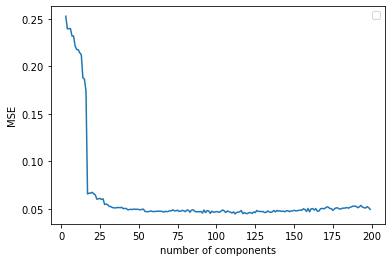

In [375]:
#몇 pca components 수 확인하기 
#50 정도가 적당했다
from matplotlib import pyplot as plt
x = np.arange(3,200)
y = np.mean(score_per_compo,axis = 1)
plt.plot(x,y)
plt.xlabel("number of components")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [377]:
np.min(score_per_compo)

0.04327961964627756

In [51]:
pca_score = []
for i in range(2):
    pca = PCA(n_components=60)
    tem = pca.fit_transform(total_df)

    pca_df = pd.DataFrame(tem)
    score = k_fold(pca_df,"lasso",0.25)
    pca_score.append(score)
np.mean(pca_score)

lasso 모델 K-fold 결과 : 0.075953 
lasso 모델 K-fold 결과 : 0.217193 
lasso 모델 K-fold 결과 : 0.075904 
lasso 모델 K-fold 결과 : 0.217101 


0.07592853006399038

# Finalilze Model

# 리그레션

In [18]:
t_data_div_100 = pd.read_csv("t_div_100.csv")
t_hands_on  = pd.read_csv("t_hands_w6.csv")
t_basic = pd.read_csv("t_basic.csv")


In [19]:
t_total =  pd.concat([t_basic,t_hands_on],axis = 1)
t_total.shape

(101, 13360)

In [21]:
total = pd.concat([basic,hands_on],axis = 1)
total.shape

(404, 13360)

In [22]:
pca = PCA(n_components=50)
total = pca.fit_transform(total)
t_total = pca.transform(t_total)

train_total = pd.DataFrame(total)
test_total = pd.DataFrame(t_total)

In [23]:
model_use = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None) 
model_use.fit(train_total, data_y)
valid_pred = model_use.predict(test_total)

In [24]:
valid_pred = pd.DataFrame(valid_pred,columns =['lr'])
valid_pred.to_csv("lr_pred.csv",index =False)

In [25]:
valid_pred

,lr
0,35.047684
1,35.005884
2,34.809860
3,35.002044
4,34.906205
...,...
96,34.901192
97,34.909766
98,34.965787
99,34.774998


# 라쏘

In [34]:
t_total =  pd.concat([t_basic,t_hands_on],axis = 1)
print(t_total.shape)

total = pd.concat([basic,hands_on],axis = 1)
print(total.shape)

(101, 13360)
(404, 13360)


In [35]:
pca = PCA(n_components=65)
total = pca.fit_transform(total)
t_total = pca.transform(t_total)

train_total = pd.DataFrame(total)
test_total = pd.DataFrame(t_total)

In [36]:
model_use = Lasso(alpha=0.25)
model_use.fit(train_total, data_y)
valid_pred = model_use.predict(test_total)

In [37]:
valid_pred = pd.DataFrame(valid_pred,columns =['lasso'])
valid_pred.to_csv("lasso_pred.csv",index =False)

In [38]:
valid_pred

,lasso
0,35.057169
1,35.013995
2,34.789726
3,34.983979
4,34.874057
...,...
96,34.865799
97,34.921845
98,34.932864
99,34.753671


# 리지

div_10 = pd.read_csv("data_div_10_len5.csv")
t_div_10 = pd.read_csv("t_div_10.csv")


In [65]:
t_total =  pd.concat([t_basic,t_hands_on],axis = 1)
print(t_total.shape)

total = pd.concat([basic,hands_on],axis = 1)
print(total.shape)

(101, 13360)
(404, 13360)


In [66]:
pca = PCA(n_components=65)
total = pca.fit_transform(total)
t_total = pca.transform(t_total)

train_total = pd.DataFrame(total)
test_total = pd.DataFrame(t_total)

In [67]:
model_use = Ridge(alpha=1)
model_use.fit(train_total, data_y)
valid_pred = model_use.predict(test_total)

In [68]:
valid_pred = pd.DataFrame(valid_pred,columns =['ridge'])
valid_pred.to_csv("ridge_pred.csv",index =False)

In [69]:
valid_pred

,ridge
0,35.060643
1,35.011198
2,34.781805
3,34.954464
4,34.869832
...,...
96,34.894494
97,34.866103
98,34.937303
99,34.763904


 # SUBMISSON

In [70]:
lr = pd.read_csv("lr_pred.csv")
lasso = pd.read_csv("lasso_pred.csv")
ridge = pd.read_csv("ridge_pred.csv")

In [71]:
ans = pd.concat([lr,lasso,ridge],axis = 1)

In [72]:
ans.head(30)

,lr,lasso,ridge
0,35.047684,35.057169,35.060643
1,35.005884,35.013995,35.011198
2,34.809860,34.789726,34.781805
3,35.002044,34.983979,34.954464
4,34.906205,34.874057,34.869832
5,34.664835,34.668946,34.676653
6,35.032052,35.021703,35.078776
7,34.946639,34.952433,34.978244
8,35.214571,35.242153,35.233490
9,35.160298,35.149699,35.174972


In [73]:
ans.to_csv("ass1(2021311558).csv",index =False)

## PRED 한 값들 비교

In [74]:
mean_squared_error(ans['lr'],ans['lasso'])

0.0006830133630867504

In [75]:
mean_squared_error(ans['lr'],ans['ridge'])

0.00072703352694471

In [76]:
mean_squared_error(ans['lasso'],ans['ridge'])

0.0005539629653127639